<a href="https://colab.research.google.com/github/wycui68/Case-Study/blob/main/Customer_Churn_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Customer Churn Analysis

### W.Cui, Dec.2020

### Dataset
Source - https://www.kaggle.com/blastchar/telco-customer-churn
1. We have customer information for a Telecommunications company
2. We've got customer IDs, general customer info, the servies they've subscribed too, type of contract and monthly charges.
3. This is a historic customer information so we have a field stating whether that customer has **churnded** 
**Field Descriptions**
- customerID - Customer ID
- gender - Whether the customer is a male or a female
- SeniorCitizen - Whether the customer is a senior citizen or not (1, 0)
- Partner - Whether the customer has a partner or not (Yes, No)
- Dependents - Whether the customer has dependents or not (Yes, No)
- tenure - Number of months the customer has stayed with the company
- PhoneService - Whether the customer has a phone service or not (Yes, No)
- MultipleLines - Whether the customer has multiple lines or not (Yes, No, No phone service)
- InternetService - Customer’s internet service provider (DSL, Fiber optic, No)
- OnlineSecurity - Whether the customer has online security or not (Yes, No, No internet service)
- OnlineBackup - Whether the customer has online backup or not (Yes, No, No internet service)
- DeviceProtection - Whether the customer has device protection or not (Yes, No, No internet service)
- TechSupport - Whether the customer has tech support or not (Yes, No, No internet service)
- StreamingTV - Whether the customer has streaming TV or not (Yes, No, No internet service)
- StreamingMovies - Whether the customer has streaming movies or not (Yes, No, No internet service)
- Contract - The contract term of the customer (Month-to-month, One year, Two year)
- PaperlessBilling - Whether the customer has paperless billing or not (Yes, No)
- PaymentMethod - The customer’s payment method (Electronic check, Mailed check Bank transfer (automatic), Credit card (automatic))
- MonthlyCharges - The amount charged to the customer monthly
- TotalCharges - The total amount charged to the customer
- Churn - Whether the customer churned or not (Yes or No)

***Customer Churn*** - churn is when an existing customer, user, player, subscriber or any kind of return client stops doing business or ends the relationship with a company.

**Aim -** is to figure our which customers may likely churn in future

In [ ]:
# Load our data
import pandas as pd

file_name = "https://raw.githubusercontent.com/rajeevratan84/datascienceforbusiness/master/WA_Fn-UseC_-Telco-Customer-Churn.csv"
churn_df = pd.read_csv(file_name)

# We use the dataframe name followed by a '.head()' to use the head function to 
# preview the first 5 records of the dataframe. If you wanted to preview the first 10, simply 
# put dataframe_name.head(10)
churn_df.head()

customerID  gender  SeniorCitizen  ... MonthlyCharges TotalCharges  Churn
0  7590-VHVEG  Female              0  ...          29.85        29.85     No
1  5575-GNVDE    Male              0  ...          56.95       1889.5     No
2  3668-QPYBK    Male              0  ...          53.85       108.15    Yes
3  7795-CFOCW    Male              0  ...          42.30      1840.75     No
4  9237-HQITU  Female              0  ...          70.70       151.65    Yes

[5 rows x 21 columns]

In [ ]:
churn_df.describe()

SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000

In [ ]:
churn_df["SeniorCitizen"].unique()

array([0, 1])

In [ ]:
churn_df["tenure"].unique()

array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
       21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
        9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
       36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
       54, 51, 26,  0, 39])

In [ ]:
# Summarize our dataset

print ("Rows     : " ,churn_df.shape[0])
print ("Columns  : " ,churn_df.shape[1])
print ("\nFeatures : \n" ,churn_df.columns.tolist())
print ("\nMissing values :  ", churn_df.isnull().sum().values.sum())
print ("\nUnique values :  \n",churn_df.nunique())

Rows     :  7043
Columns  :  21

Features : 
 ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

Missing values :   0

Unique values :  
 customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64


In [ ]:
churn_df["Churn"].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

# Exploratory Data Analysis

In [ ]:
# Keep a copy 
churn_df_copy = churn_df.copy()

In [ ]:
churn_df_copy.drop(["customerID", "MonthlyCharges", "TotalCharges", "tenure"], axis = 1, inplace = True)
churn_df_copy.head()

gender  SeniorCitizen  ...              PaymentMethod Churn
0  Female              0  ...           Electronic check    No
1    Male              0  ...               Mailed check    No
2    Male              0  ...               Mailed check   Yes
3    Male              0  ...  Bank transfer (automatic)    No
4  Female              0  ...           Electronic check   Yes

[5 rows x 17 columns]

In [ ]:
# Create a new dataset called summary so that we can summarize our churn data
# Crosstab - Compute a simple cross tabulation of two (or more) factors. By default computes a frequency table of the factors unless an array of values and an aggregation function are passed.
summary = pd.concat([pd.crosstab(churn_df_copy[x], churn_df_copy.Churn) for x in churn_df_copy.columns[:-1]], keys=churn_df_copy.columns[:-1])
summary

Churn                                         No   Yes
gender           Female                     2549   939
                 Male                       2625   930
SeniorCitizen    0                          4508  1393
                 1                           666   476
Partner          No                         2441  1200
                 Yes                        2733   669
Dependents       No                         3390  1543
                 Yes                        1784   326
PhoneService     No                          512   170
                 Yes                        4662  1699
MultipleLines    No                         2541   849
                 No phone service            512   170
                 Yes                        2121   850
InternetService  DSL                        1962   459
                 Fiber optic                1799  1297
                 No                         1413   113
OnlineSecurity   No                         2037  1461
                 No internet service        1413   113
                 Yes                        1724   295
OnlineBackup     No                         1855  1233
                 No internet service        1413   113
                 Yes                        1906   523
DeviceProtection No                         1884  1211
                 No internet service        1413   113
                 Yes                        1877   545
TechSupport      No                         2027  1446
                 No internet service        1413   113
                 Yes                        1734   310
StreamingTV      No                         1868   942
                 No internet service        1413   113
                 Yes                        1893   814
StreamingMovies  No                         1847   938
                 No internet service        1413   113
                 Yes                        1914   818
Contract         Month-to-month             2220  1655
                 One year                   1307   166
                 Two year                   1647    48
PaperlessBilling No                         2403   469
                 Yes                        2771  1400
PaymentMethod    Bank transfer (automatic)  1286   258
                 Credit card (automatic)    1290   232
                 Electronic check           1294  1071
                 Mailed check               1304   308

In [ ]:
# Example of how Cross Tab works
# A crosstabulation (also known as a contingency table) shows the frequency between two variables. This is the default functionality for crosstab if given two columns.
import numpy as np

df = pd.DataFrame({'A' : ['one', 'one', 'two', 'three'] * 3,
                   'B' : ['X', 'Y', 'Z'] * 4,
                   'C' : ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
                   'D' : np.random.randn(12),
                   'E' : np.random.randn(12)})
df

A  B    C         D         E
0     one  X  foo  0.710612 -0.769250
1     one  Y  foo  1.608228 -0.627603
2     two  Z  foo -1.530334  0.824840
3   three  X  bar  0.621216 -0.777204
4     one  Y  bar  0.191483 -1.128803
5     one  Z  bar -0.604238 -0.055195
6     two  X  foo  0.888018 -0.352084
7   three  Y  foo -2.015825  1.000702
8     one  Z  foo -1.331205 -1.500068
9     one  X  bar -0.719215  0.916155
10    two  Y  bar -0.928897 -0.364666
11  three  Z  bar -0.951127  0.524593

In [ ]:
pd.crosstab(index = df.A, columns = df.B)

B      X  Y  Z
A             
one    2  2  2
three  1  1  1
two    1  1  1

In [ ]:
# Make a percentage column

summary["Churn_Percentage"] = summary["Yes"] / (summary["No"] + summary["Yes"])
summary

Churn                                         No   Yes  Churn_Percentage
gender           Female                     2549   939          0.269209
                 Male                       2625   930          0.261603
SeniorCitizen    0                          4508  1393          0.236062
                 1                           666   476          0.416813
Partner          No                         2441  1200          0.329580
                 Yes                        2733   669          0.196649
Dependents       No                         3390  1543          0.312791
                 Yes                        1784   326          0.154502
PhoneService     No                          512   170          0.249267
                 Yes                        4662  1699          0.267096
MultipleLines    No                         2541   849          0.250442
                 No phone service            512   170          0.249267
                 Yes                        2121   850          0.286099
InternetService  DSL                        1962   459          0.189591
                 Fiber optic                1799  1297          0.418928
                 No                         1413   113          0.074050
OnlineSecurity   No                         2037  1461          0.417667
                 No internet service        1413   113          0.074050
                 Yes                        1724   295          0.146112
OnlineBackup     No                         1855  1233          0.399288
                 No internet service        1413   113          0.074050
                 Yes                        1906   523          0.215315
DeviceProtection No                         1884  1211          0.391276
                 No internet service        1413   113          0.074050
                 Yes                        1877   545          0.225021
TechSupport      No                         2027  1446          0.416355
                 No internet service        1413   113          0.074050
                 Yes                        1734   310          0.151663
StreamingTV      No                         1868   942          0.335231
                 No internet service        1413   113          0.074050
                 Yes                        1893   814          0.300702
StreamingMovies  No                         1847   938          0.336804
                 No internet service        1413   113          0.074050
                 Yes                        1914   818          0.299414
Contract         Month-to-month             2220  1655          0.427097
                 One year                   1307   166          0.112695
                 Two year                   1647    48          0.028319
PaperlessBilling No                         2403   469          0.163301
                 Yes                        2771  1400          0.335651
PaymentMethod    Bank transfer (automatic)  1286   258          0.167098
                 Credit card (automatic)    1290   232          0.152431
                 Electronic check           1294  1071          0.452854
                 Mailed check               1304   308          0.191067

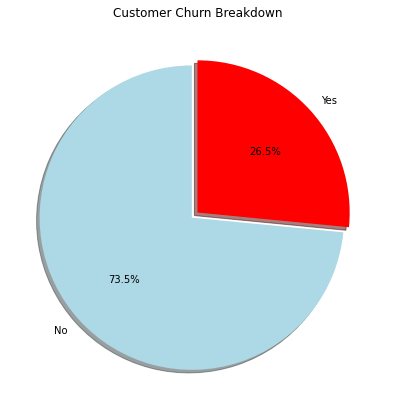

In [ ]:
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph.
from pylab import rcParams # Customize Matplotlib plots using rcParams

# Data to plot
labels = churn_df['Churn'].value_counts(sort = True).index
sizes = churn_df['Churn'].value_counts(sort = True)

colors = ["lightblue","red"]
explode = (0.05,0)  # explode 1st slice
 
rcParams['figure.figsize'] = 7,7
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90,)

plt.title('Customer Churn Breakdown')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


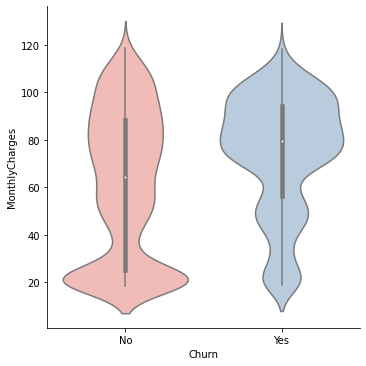

In [ ]:
# Create a Volin Plot showing how monthy charges relate to Churn
# We an see that Churned customers tend to be higher paying customers
g = sns.factorplot(x="Churn", y = "MonthlyCharges",data = churn_df, kind="violin", palette = "Pastel1")

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


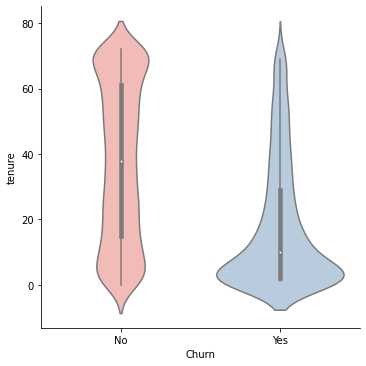

In [ ]:
g = sns.factorplot(x="Churn", y = "tenure",data = churn_df, kind="violin", palette = "Pastel1")

No handles with labels found to put in legend.


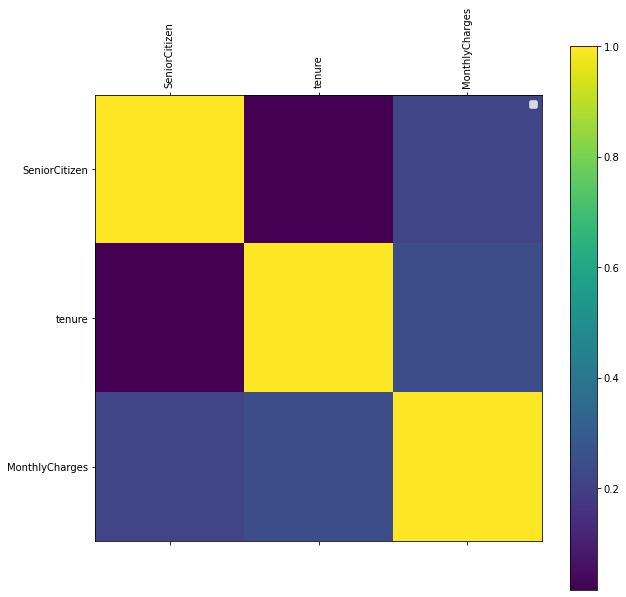

In [ ]:
import matplotlib.pyplot as plt

def plot_corr(df,size=10):
    '''Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot'''

    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.legend()
    cax = ax.matshow(corr)
    fig.colorbar(cax)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical')
    plt.yticks(range(len(corr.columns)), corr.columns)
    
plot_corr(churn_df)

# Prepare data for machine learning

In [ ]:
# Check for empty fields, Note, " " is not Null but a spaced character
len(churn_df[churn_df['TotalCharges'] == " "])

11

In [ ]:
## Drop missing data
churn_df = churn_df[churn_df['TotalCharges'] != " "]

In [ ]:
len(churn_df[churn_df['TotalCharges'] == " "])

0

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

#customer id col
Id_col = ['customerID']

#Target columns
target_col = ["Churn"]

#categorical columns
cat_cols = churn_df.nunique()[churn_df.nunique() < 6].keys().tolist()
cat_cols = [x for x in cat_cols if x not in target_col]

#numerical columns
num_cols = [x for x in churn_df.columns if x not in cat_cols + target_col + Id_col]

#Binary columns with 2 values
bin_cols = churn_df.nunique()[churn_df.nunique() == 2].keys().tolist()

#Columns more than 2 values
multi_cols = [i for i in cat_cols if i not in bin_cols]

#Label encoding Binary columns
le = LabelEncoder()
for i in bin_cols :
    churn_df[i] = le.fit_transform(churn_df[i])
    
#Duplicating columns for multi value columns
churn_df = pd.get_dummies(data = churn_df, columns = multi_cols )
churn_df.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


customerID  ...  PaymentMethod_Mailed check
0  7590-VHVEG  ...                           0
1  5575-GNVDE  ...                           1
2  3668-QPYBK  ...                           1
3  7795-CFOCW  ...                           0
4  9237-HQITU  ...                           0

[5 rows x 42 columns]

In [ ]:
len(churn_df.columns)

42

In [ ]:
#Scaling Numerical columns
std = StandardScaler()

# Scale data
scaled = std.fit_transform(churn_df[num_cols])
scaled = pd.DataFrame(scaled,columns=num_cols)

#dropping original values merging scaled values for numerical columns
df_telcom_og = churn_df.copy()
churn_df = churn_df.drop(columns = num_cols,axis = 1)
churn_df = churn_df.merge(scaled, left_index=True, right_index=True, how = "left")

#churn_df.info()
churn_df.head()

customerID  gender  SeniorCitizen  ...    tenure  MonthlyCharges  TotalCharges
0  7590-VHVEG       0              0  ... -1.280248       -1.161694     -0.994194
1  5575-GNVDE       1              0  ...  0.064303       -0.260878     -0.173740
2  3668-QPYBK       1              0  ... -1.239504       -0.363923     -0.959649
3  7795-CFOCW       1              0  ...  0.512486       -0.747850     -0.195248
4  9237-HQITU       0              0  ... -1.239504        0.196178     -0.940457

[5 rows x 42 columns]

In [ ]:
churn_df.drop(["customerID"], axis = 1, inplace = True)
churn_df.head()

gender  SeniorCitizen  Partner  ...    tenure  MonthlyCharges  TotalCharges
0       0              0        1  ... -1.280248       -1.161694     -0.994194
1       1              0        0  ...  0.064303       -0.260878     -0.173740
2       1              0        0  ... -1.239504       -0.363923     -0.959649
3       1              0        0  ...  0.512486       -0.747850     -0.195248
4       0              0        0  ... -1.239504        0.196178     -0.940457

[5 rows x 41 columns]

In [ ]:
churn_df[churn_df.isnull().any(axis=1)]

gender  SeniorCitizen  Partner  ...  tenure  MonthlyCharges  TotalCharges
7032       1              1        0  ...     NaN             NaN           NaN
7033       1              0        0  ...     NaN             NaN           NaN
7034       0              0        0  ...     NaN             NaN           NaN
7035       1              0        0  ...     NaN             NaN           NaN
7036       0              0        0  ...     NaN             NaN           NaN
7037       0              0        0  ...     NaN             NaN           NaN
7038       1              0        1  ...     NaN             NaN           NaN
7039       0              0        1  ...     NaN             NaN           NaN
7040       0              0        1  ...     NaN             NaN           NaN
7041       1              1        1  ...     NaN             NaN           NaN
7042       1              0        0  ...     NaN             NaN           NaN

[11 rows x 41 columns]

In [ ]:
churn_df = churn_df.dropna()

# Modeling

In [ ]:
from sklearn.model_selection import train_test_split

X = churn_df.drop(["Churn"], axis = 1).values

y = churn_df["Churn"].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123)

In [ ]:
df_train = pd.DataFrame(X_train)
df_train.head()

0    1    2    3    4    5   ...   34   35   36        37        38        39
0  0.0  0.0  0.0  0.0  1.0  1.0  ...  0.0  0.0  1.0 -1.076528 -0.480265 -0.868588
1  0.0  0.0  0.0  1.0  1.0  0.0  ...  0.0  0.0  1.0  1.286622  1.141869  1.715293
2  0.0  0.0  1.0  0.0  1.0  0.0  ...  0.0  1.0  0.0 -1.239504  0.733011 -0.938384
3  1.0  0.0  1.0  0.0  1.0  0.0  ...  1.0  0.0  0.0 -1.198760 -0.151184 -0.932141
4  1.0  0.0  1.0  1.0  1.0  0.0  ...  1.0  0.0  0.0 -0.669089 -1.499084 -0.856301

[5 rows x 40 columns]

# Fit a Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

model = LogisticRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)
score = model.score(X_test, y_test)

print("Accuracy = " + str(score))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

Accuracy = 0.7821547223540579
[[1339  159]
 [ 300  309]]
              precision    recall  f1-score   support

           0       0.82      0.89      0.85      1498
           1       0.66      0.51      0.57       609

    accuracy                           0.78      2107
   macro avg       0.74      0.70      0.71      2107
weighted avg       0.77      0.78      0.77      2107



## Feature Importance

In [ ]:
coef = model.coef_[0]
coef = [abs(number) for number in coef]
print(coef)

[0.09149263035830614, 0.06276273312179223, 0.238046796554031, 0.05963569745692185, 0.12914079736821013, 0.27638303691840266, 0.046879664761736724, 0.1295057817994219, 0.08226113260661283, 0.39006466340168633, 0.47472443862819136, 0.0842947907955324, 0.339797945170235, 0.0842947907955324, 0.2551381699435283, 0.24640159603838646, 0.0842947907955324, 0.16174182081174507, 0.1273730343608236, 0.0842947907955324, 0.04271325913419421, 0.26345940555431685, 0.0842947907955324, 0.17879963032764126, 0.05735414119532295, 0.0842947907955324, 0.14201391642192493, 0.020311241736549402, 0.0842947907955324, 0.10497101696316734, 1.109744047838765, 0.08268397648298893, 1.0266950869246378, 0.15991659022967683, 0.2017413592614635, 0.29686691989596936, 0.06515601402621969, 0.058672758482399695, 0.05359049069052834, 0.1361223117408717]


In [ ]:
# Finding and deleting the label column
cols = list(churn_df.columns)
cols.index('Churn')

6

In [ ]:
del cols[6]
cols

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'PaperlessBilling',
 'MultipleLines_No',
 'MultipleLines_No phone service',
 'MultipleLines_Yes',
 'InternetService_DSL',
 'InternetService_Fiber optic',
 'InternetService_No',
 'OnlineSecurity_No',
 'OnlineSecurity_No internet service',
 'OnlineSecurity_Yes',
 'OnlineBackup_No',
 'OnlineBackup_No internet service',
 'OnlineBackup_Yes',
 'DeviceProtection_No',
 'DeviceProtection_No internet service',
 'DeviceProtection_Yes',
 'TechSupport_No',
 'TechSupport_No internet service',
 'TechSupport_Yes',
 'StreamingTV_No',
 'StreamingTV_No internet service',
 'StreamingTV_Yes',
 'StreamingMovies_No',
 'StreamingMovies_No internet service',
 'StreamingMovies_Yes',
 'Contract_Month-to-month',
 'Contract_One year',
 'Contract_Two year',
 'PaymentMethod_Bank transfer (automatic)',
 'PaymentMethod_Credit card (automatic)',
 'PaymentMethod_Electronic check',
 'PaymentMethod_Mailed check',
 'tenure',
 'MonthlyCharges',
 'Tota

In [ ]:
# Sorting on Feature Importance
sorted_index = sorted(range(len(coef)), key = lambda k: coef[k], reverse = True)
for idx in sorted_index:
    print(cols[idx])

Contract_Month-to-month
Contract_Two year
InternetService_Fiber optic
InternetService_DSL
OnlineSecurity_No
PaymentMethod_Electronic check
PaperlessBilling
TechSupport_No
OnlineSecurity_Yes
OnlineBackup_No
Partner
PaymentMethod_Credit card (automatic)
TechSupport_Yes
OnlineBackup_Yes
PaymentMethod_Bank transfer (automatic)
StreamingTV_Yes
TotalCharges
MultipleLines_No phone service
PhoneService
DeviceProtection_No
StreamingMovies_Yes
gender
InternetService_No
OnlineSecurity_No internet service
OnlineBackup_No internet service
DeviceProtection_No internet service
TechSupport_No internet service
StreamingTV_No internet service
StreamingMovies_No internet service
Contract_One year
MultipleLines_Yes
PaymentMethod_Mailed check
SeniorCitizen
Dependents
tenure
StreamingTV_No
MonthlyCharges
MultipleLines_No
DeviceProtection_Yes
StreamingMovies_No


# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)

predictions = model_rf.predict(X_test)
score = model_rf.score(X_test, y_test)

print("Accuracy = " + str(score))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

Accuracy = 0.7636449928808733
[[1333  165]
 [ 333  276]]
              precision    recall  f1-score   support

           0       0.80      0.89      0.84      1498
           1       0.63      0.45      0.53       609

    accuracy                           0.76      2107
   macro avg       0.71      0.67      0.68      2107
weighted avg       0.75      0.76      0.75      2107



# Neural Network with Early Stopping

In [ ]:
%tensorflow_version 2.x 

In [ ]:
import tensorflow as tf

tf.test.gpu_device_name()

''

In [ ]:
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import ModelCheckpoint
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

model.add(Dense(20, kernel_initializer = "uniform",activation = "relu", input_dim=40))
model.add(Dense(1, kernel_initializer = "uniform",activation = "sigmoid"))

model.compile(optimizer= "adam",loss = "binary_crossentropy",metrics = ["accuracy"])

In [ ]:
# Start Training Our Classifier 

batch_size = 64
epochs = 25

history = model.fit(X_train,
                    y_train,
                    batch_size = batch_size,
                    epochs = epochs,
                    verbose = 1,
                    validation_data = (X_test, y_test))

score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/25
77/77 [==============================] - 1s 4ms/step - loss: 0.6585 - accuracy: 0.7160 - val_loss: 0.5575 - val_accuracy: 0.7110
Epoch 2/25
77/77 [==============================] - 0s 2ms/step - loss: 0.5064 - accuracy: 0.7460 - val_loss: 0.4853 - val_accuracy: 0.7523
Epoch 3/25
77/77 [==============================] - 0s 2ms/step - loss: 0.4416 - accuracy: 0.7818 - val_loss: 0.4682 - val_accuracy: 0.7712
Epoch 4/25
77/77 [==============================] - 0s 2ms/step - loss: 0.4418 - accuracy: 0.7926 - val_loss: 0.4648 - val_accuracy: 0.7708
Epoch 5/25
77/77 [==============================] - 0s 2ms/step - loss: 0.4387 - accuracy: 0.7847 - val_loss: 0.4615 - val_accuracy: 0.7769
Epoch 6/25
77/77 [==============================] - 0s 2ms/step - loss: 0.4422 - accuracy: 0.7781 - val_loss: 0.4668 - val_accuracy: 0.7703
Epoch 7/25
77/77 [==============================] - 0s 2ms/step - loss: 0.4219 - accuracy: 0.7897 - val_loss: 0.4601 - val_accuracy: 0.7774
Epoch 8/25
77/77 [==

In [ ]:
predictions = model.predict(X_test)
predictions = (predictions > 0.5)

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[1327  171]
 [ 292  317]]
              precision    recall  f1-score   support

           0       0.82      0.89      0.85      1498
           1       0.65      0.52      0.58       609

    accuracy                           0.78      2107
   macro avg       0.73      0.70      0.71      2107
weighted avg       0.77      0.78      0.77      2107



In [ ]:
model2 = Sequential()

# Hidden Layer 1
model2.add(Dense(2000, activation='relu', input_dim=40, kernel_regularizer=l2(0.01)))
model2.add(Dropout(0.3, noise_shape=None, seed=None))

# Hidden Layer 1
model2.add(Dense(1000, activation='relu', input_dim=18, kernel_regularizer=l2(0.01)))
model2.add(Dropout(0.3, noise_shape=None, seed=None))

# Hidden Layer 2
model2.add(Dense(500, activation = 'relu', kernel_regularizer=l2(0.01)))
model2.add(Dropout(0.3, noise_shape=None, seed=None))

model2.add(Dense(1, activation='sigmoid'))

model2.summary()

# Create our checkpoint so that we save each model after each epoch
checkpoint = ModelCheckpoint("deep_model_checkpoint.h5",
                             monitor="val_loss",
                             mode="min",
                             save_best_only = True,
                             verbose=1)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 2000)              82000     
_________________________________________________________________
dropout_3 (Dropout)          (None, 2000)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 1000)              2001000   
_________________________________________________________________
dropout_4 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 500)               500500    
_________________________________________________________________
dropout_5 (Dropout)          (None, 500)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 1)                

In [ ]:
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Define our earling stoppping criteria
from tensorflow.keras.callbacks import EarlyStopping 

earlystop = EarlyStopping(monitor = 'val_loss', # value being monitored for improvement
                          min_delta = 0, #Abs value and is the min change required before we stop
                          patience = 2, #Number of epochs we wait before stopping 
                          verbose = 1,
                          restore_best_weights = True) #keeps the best weigths once stopped

# we put our call backs into a callback list
callbacks = [earlystop, checkpoint]

In [ ]:
batch_size = 32
epochs = 10

history = model2.fit(X_train,
                    y_train,
                    batch_size = batch_size,
                    epochs = epochs,
                    verbose = 1,
                    # NOTE We are adding our callbacks here
                    callbacks = callbacks,
                    validation_data = (X_test, y_test))

score = model2.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/10
154/154 [==============================] - 7s 39ms/step - loss: 6.8666 - accuracy: 0.7486 - val_loss: 0.5465 - val_accuracy: 0.7537

Epoch 00001: val_loss improved from inf to 0.54646, saving model to deep_model_checkpoint.h5
Epoch 2/10
154/154 [==============================] - 6s 39ms/step - loss: 0.4903 - accuracy: 0.7900 - val_loss: 0.5073 - val_accuracy: 0.7788

Epoch 00002: val_loss improved from 0.54646 to 0.50732, saving model to deep_model_checkpoint.h5
Epoch 3/10
154/154 [==============================] - 6s 38ms/step - loss: 0.4852 - accuracy: 0.7734 - val_loss: 0.5025 - val_accuracy: 0.7841

Epoch 00003: val_loss improved from 0.50732 to 0.50246, saving model to deep_model_checkpoint.h5
Epoch 4/10
154/154 [==============================] - 6s 38ms/step - loss: 0.4687 - accuracy: 0.7892 - val_loss: 0.4985 - val_accuracy: 0.7703

Epoch 00004: val_loss improved from 0.50246 to 0.49854, saving model to deep_model_checkpoint.h5
Epoch 5/10
154/154 [====================